# Time Series Forecasting using ARIMA and LSTM

In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 4.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-macosx_10_9_universal2.whl size=427760 sha256=4ae99bc0b62705bbaaf422786f1422bdfcc9bf0eb4c0db718e64051c533a24a7
  Stored in directory: /Users/bharathreddy97/Library/Caches/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import yfinance as yf
df = yf.download('TSLA', start = '2020-01-01', end = '2024-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500


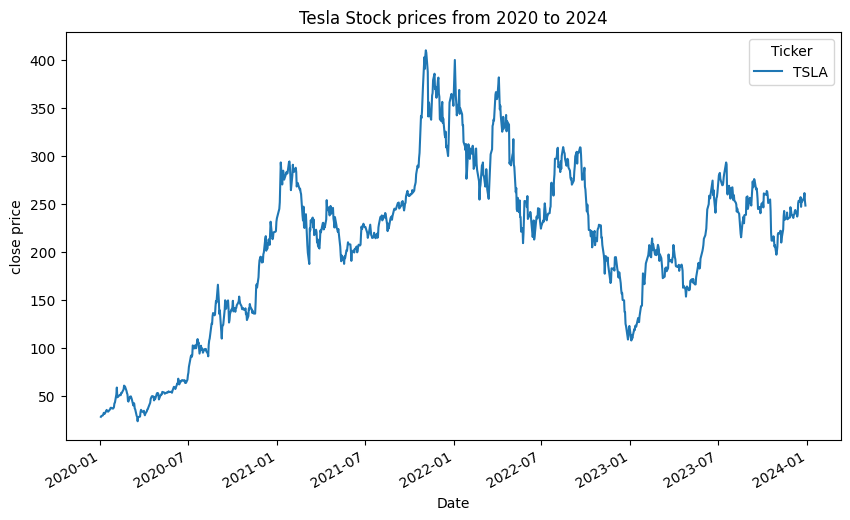

In [4]:
df['Close'].plot(figsize =(10,6))
plt.title("Tesla Stock prices from 2020 to 2024")
plt.xlabel("Date")
plt.ylabel("close price")
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Close'])
print(result)

(-2.4075451769779628, 0.13961815309788128, 9, 996, {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}, 7022.519832499001)


In [7]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.6 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
print("ADF statistic:", result[0])
print("p-value:", result[1])

ADF statistic: -2.4075451769779628
p-value: 0.13961815309788128


In [10]:
if result[1]>0.05:
    print("series is nt stationary, differencing is needed")
else:
    print("series is statioanry")

series is nt stationary, differencing is needed


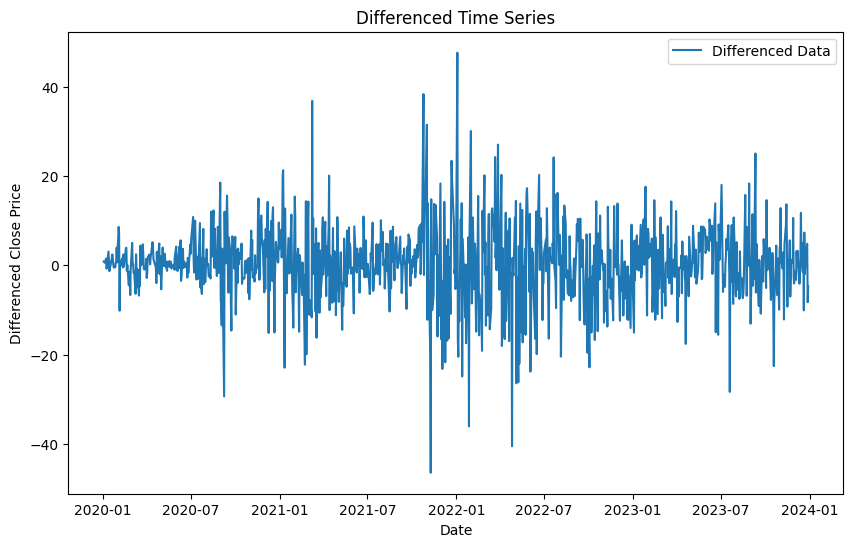

In [11]:
df['Close_diff'] = df['Close'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'], label='Differenced Data')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close_diff'].dropna(),order=(2,1,2))
fitted_model = model.fit()
print(fitted_model.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 1005
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3582.309
Date:                Sun, 24 Nov 2024   AIC                           7174.618
Time:                        09:35:25   BIC                           7199.176
Sample:                             0   HQIC                          7183.950
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9849      1.275     -0.773      0.440      -3.483       1.514
ar.L2         -0.0293      0.041     -0.708      0.479      -0.110       0.052
ma.L1         -0.0443      1.272     -0.035      0.9

In [17]:
forecast = fitted_model.forecast(steps=10)
print("Forecast values:", forecast)

Forecast values: 1005    0.347661
1006    0.206562
1007    0.197819
1008    0.210560
1009    0.198267
1010    0.210002
1011    0.198804
1012    0.209489
1013    0.199292
1014    0.209023
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
df.describe

<bound method NDFrame.describe of Price        Adj Close       Close        High         Low        Open  \
Ticker            TSLA        TSLA        TSLA        TSLA        TSLA   
Date                                                                     
2020-01-02   28.684000   28.684000   28.713333   28.114000   28.299999   
2020-01-03   29.534000   29.534000   30.266666   29.128000   29.366667   
2020-01-06   30.102667   30.102667   30.104000   29.333332   29.364668   
2020-01-07   31.270666   31.270666   31.441999   30.224001   30.760000   
2020-01-08   32.809334   32.809334   33.232666   31.215334   31.580000   
...                ...         ...         ...         ...         ...   
2023-12-22  252.539993  252.539993  258.220001  251.369995  256.760010   
2023-12-26  256.609985  256.609985  257.970001  252.910004  254.490005   
2023-12-27  261.440002  261.440002  263.339996  257.519989  258.350006   
2023-12-28  253.179993  253.179993  265.130005  252.710007  263.660004   
2023

In [20]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Close_diff
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2020-01-02,28.684000,28.684000,28.713333,28.114000,28.299999,142981500,NaN
2020-01-03,29.534000,29.534000,30.266666,29.128000,29.366667,266677500,0.850000
2020-01-06,30.102667,30.102667,30.104000,29.333332,29.364668,151995000,0.568666
2020-01-07,31.270666,31.270666,31.441999,30.224001,30.760000,268231500,1.167999
2020-01-08,32.809334,32.809334,33.232666,31.215334,31.580000,467164500,1.538668


In [22]:
df['Close'].shape

(1006, 1)

In [21]:
close_price = df['Close'].values
close_price = close_price.reshape(-1,1)

In [23]:
close_price.shape

(1006, 1)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normalized_data = scaler.fit_transform(df['Close'])

In [31]:
len(normalized_data)

1006

In [34]:
#preparing data for LSTM
import numpy as np
def create_sequences(data, sequence_length):
    x,y =[],[]
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x),np.array(y)

sequence_length=60
x,y = create_sequences(normalized_data, sequence_length)
        

In [38]:
#len(x)
len(y)

946

In [39]:
# split training and testing sets

split = int(len(x) * 0.8)
x_train, x_test = x[:split],x[split:]
y_train, y_test = y[:split],y[split:]

In [40]:
# Build LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-11-26 16:46:59.413353: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (sequence_length, 1)),
    LSTM(50, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer ='adam', loss ='mean_squared_error')
model.fit(x_train, y_train,batch_size=32, epochs=50)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0822
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0056
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0034
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0034
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0030
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0022
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0021
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0022
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0024
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0021
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0020
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0017
Epoc

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 6.65602489270662
RMSE: 8.709665207871202


In [44]:
predictions

array([[192.50064],
       [193.54666],
       [198.74101],
       [199.41643],
       [197.64253],
       [193.06425],
       [188.73213],
       [185.59415],
       [184.64192],
       [182.77606],
       [183.08598],
       [183.83743],
       [185.31413],
       [185.76204],
       [184.53268],
       [177.3453 ],
       [170.97093],
       [165.8847 ],
       [162.22462],
       [158.1175 ],
       [157.15958],
       [158.95735],
       [160.63976],
       [161.48152],
       [161.92233],
       [162.26515],
       [165.2029 ],
       [168.75476],
       [170.687  ],
       [171.24141],
       [172.15622],
       [171.50746],
       [169.91339],
       [168.42433],
       [169.68304],
       [172.51126],
       [176.18776],
       [181.97635],
       [185.78311],
       [186.77818],
       [186.86798],
       [189.33864],
       [194.4677 ],
       [199.88412],
       [204.94598],
       [210.45285],
       [215.50621],
       [219.93959],
       [223.69405],
       [229.51765],


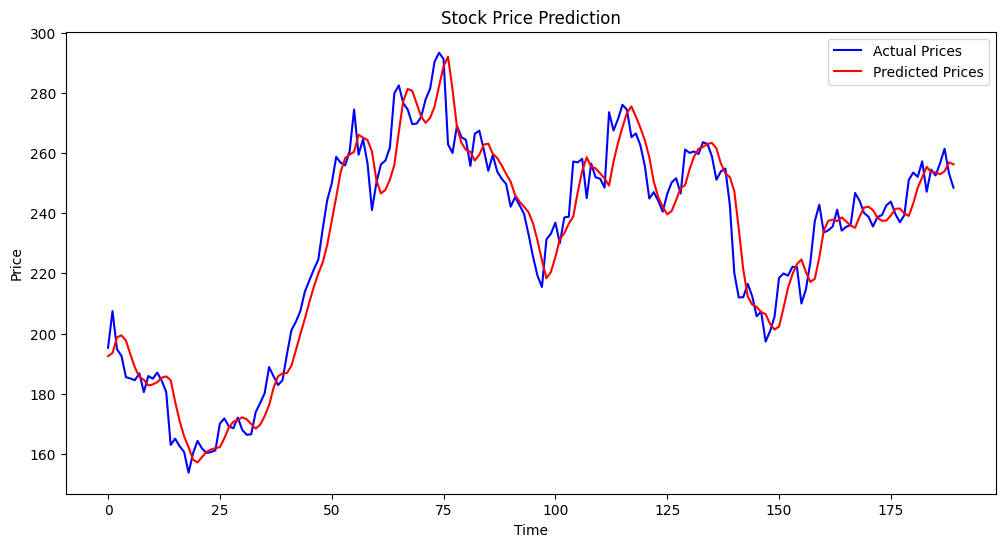

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()